In [1]:
from datasets import load_dataset
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import cm

dataset = load_dataset("refugee-law-lab/canadian-legal-data", split="train")

# convert to dataframe
df = pd.DataFrame(dataset)
df

# filter for language = 'en'
df = df[df['language'] == 'en']



d:\AI-Projects\venv311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def make_wordcloud(temp_df, cmap_color='cool', cmap_number = 800, layout_padding = 6, wordcloud_title = 'TITLE'):

    # join all the text in df.unofficial_text
    text = ' '.join(temp_df['unofficial_text'])

    stopwords = set(STOPWORDS)

    stopwords.update(["xxx",
                     "xxxx xxxx",
                     "xxxx",
                     "mr",
                     "v",
                     "s",
                     "m",
                     "ms",
                     "tribunal",
                     "complaint",
                     "commission",
                     "respondent",
                     "complainant",
                     "canadian",
                     "canada",
                     "partie",
                     "section",
                     "para",
                     "paragraph",
                     "c",
                     "one",
                     "two"
                     ])
  
    colour_map = plt.cm.get_cmap(cmap_color, cmap_number)

    # Create a WordCloud object with a white background
    colour_map = plt.cm.get_cmap(cmap_color, cmap_number)
   
    wordcloud = WordCloud(
        width = 1200, height = 1000,
        min_font_size = 14,
        max_font_size = 200,
        max_words = 175,
        collocations=False,
        colormap=colour_map,
        prefer_horizontal=0.75,
        margin=10,
        stopwords = stopwords,
        background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize = (100,10), facecolor = 'white')
    plt.title(wordcloud_title+'\n', fontsize=20)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = layout_padding)
    plt.show()

    return None




C:\Users\SR\AppData\Local\Temp\ipykernel_12316\1218110415.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colour_map = plt.cm.get_cmap(cmap_color, cmap_number)
C:\Users\SR\AppData\Local\Temp\ipykernel_12316\1218110415.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colour_map = plt.cm.get_cmap(cmap_color, cmap_number)


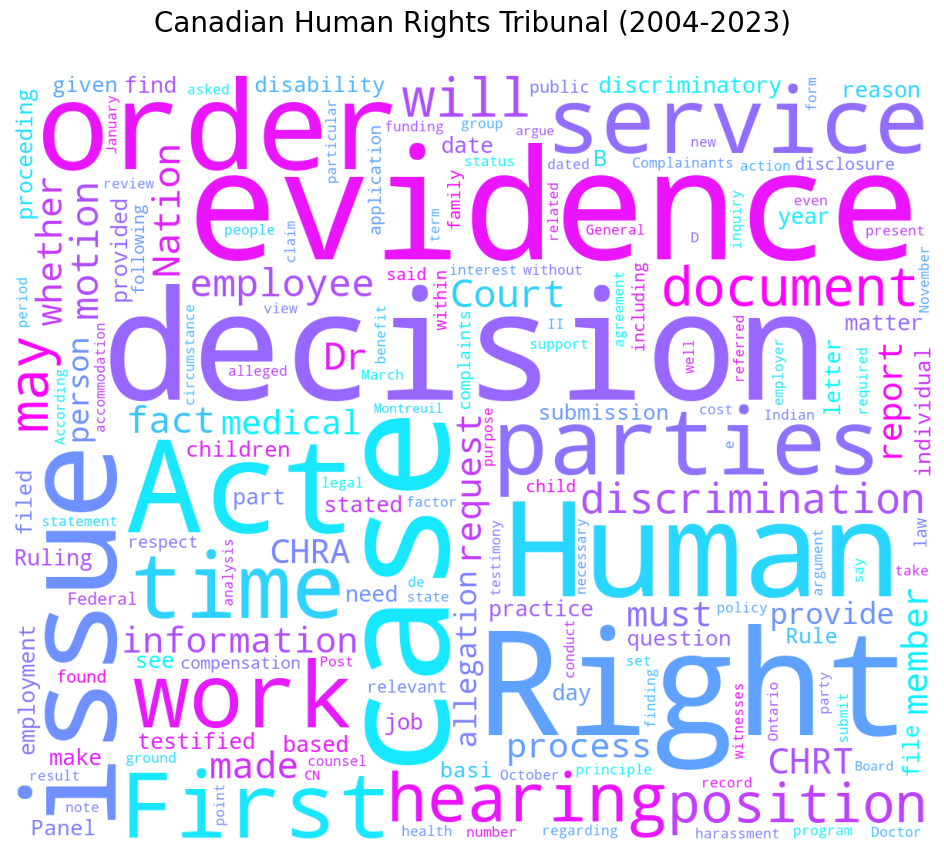

In [3]:
temp_df = df[df['dataset'] == 'CHRT']
temp_df = temp_df[temp_df['year'] > 2003]
make_wordcloud(temp_df, wordcloud_title="Canadian Human Rights Tribunal (2004-2023)")